In [57]:
import numpy as np
import pandas as pd
from pylab import plt
from nsetools import Nse
from nsepy import get_history
from datetime import date
import datetime as dt
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('mode.chained_assignment', None)

In [2]:
url = 'http://hilpisch.com/tr_eikon_eod_data.csv'

In [3]:
raw = pd.read_csv(url, index_col=0, parse_dates=True).dropna()

In [9]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [10]:
raw.iloc[0]

AAPL.O      30.572827
MSFT.O      30.950000
INTC.O      20.880000
AMZN.O     133.900000
GS.N       173.080000
SPY        113.330000
.SPX      1132.990000
.VIX        20.040000
EUR=         1.441100
XAU=      1120.000000
GDX         47.710000
GLD        109.800000
Name: 2010-01-04 00:00:00, dtype: float64

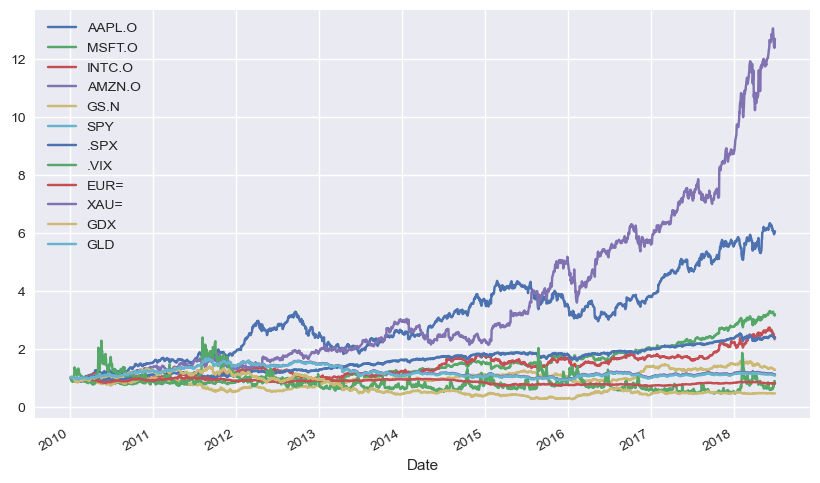

In [12]:
(raw / raw.iloc[0]).plot(figsize=(10, 6));

### simple trading stretagy

In [143]:
symbol = 'SBIN'
days = 1000
end = dt.datetime.today()
start = end - pd.Timedelta(days=days)
data = get_history(symbol, start=start, end=end)

In [144]:
data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-01-20,SBIN,EQ,318.00,321.00,321.45,313.40,314.00,314.00,315.92,30682902,9.693233e+14,194552,9480868,0.3090
2020-01-21,SBIN,EQ,314.00,313.80,316.95,312.00,313.90,313.70,314.33,30591772,9.615857e+14,195704,8007764,0.2618
2020-01-22,SBIN,EQ,313.70,317.00,317.00,313.70,315.65,316.15,315.30,24994911,7.880972e+14,154068,6323683,0.2530
2020-01-23,SBIN,EQ,316.15,316.00,324.80,314.15,323.15,323.20,320.25,33293610,1.066218e+15,227748,7297640,0.2192
2020-01-24,SBIN,EQ,323.20,323.50,327.30,321.15,324.30,324.05,325.15,22706879,7.383247e+14,146667,3659434,0.1612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-10,SBIN,EQ,530.20,525.70,533.90,522.20,531.40,530.75,528.13,9649292,5.096053e+14,191653,3588945,0.3719
2022-10-11,SBIN,EQ,530.75,530.75,533.70,525.50,527.00,527.40,529.35,10825440,5.730463e+14,159970,4518524,0.4174
2022-10-12,SBIN,EQ,527.40,530.00,535.00,526.00,535.00,533.80,530.03,8522604,4.517236e+14,121592,3016240,0.3539


In [169]:
# data.to_csv('sbin_365.csv')
data = pd.read_csv('sbin_365.csv')

In [170]:
data.set_index('Date',inplace = True)

In [171]:
# symbol = 'AAPL.O'
# data = pd.DataFrame(raw[symbol])

In [172]:
symbol = 'Close'

In [173]:
data = data[[symbol]]

In [174]:
data['SMA1'] = data[symbol].rolling(5).mean()
data['SMA2'] = data[symbol].rolling(20).mean()

In [175]:
data

,Close,SMA1,SMA2
Date,,,
2020-01-20,314.00,NaN,NaN
2020-01-21,313.70,NaN,NaN
2020-01-22,316.15,NaN,NaN
2020-01-23,323.20,NaN,NaN
2020-01-24,324.05,318.22,NaN
...,...,...,...
2022-10-10,530.75,530.14,548.0100
2022-10-11,527.40,531.67,546.6350
2022-10-12,533.80,531.89,545.4250


In [176]:
data.dropna(inplace = True)

<AxesSubplot:xlabel='Date'>

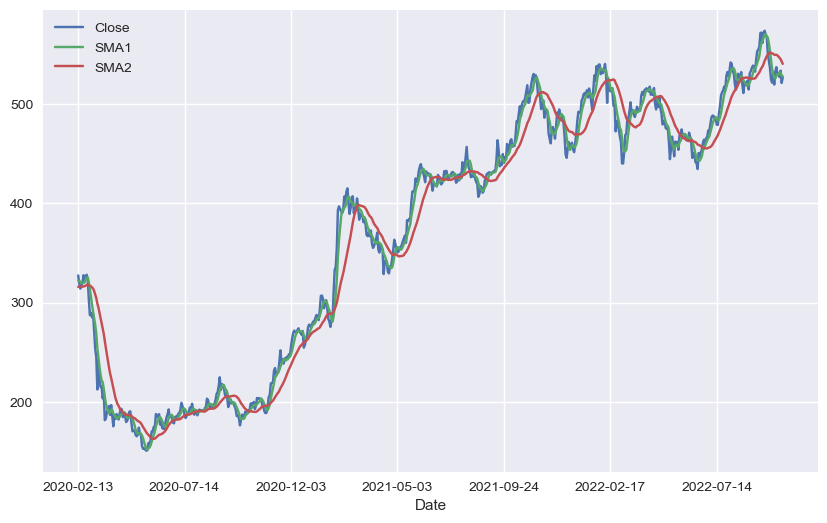

In [177]:
data.plot(figsize = (10,6))

In [178]:
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

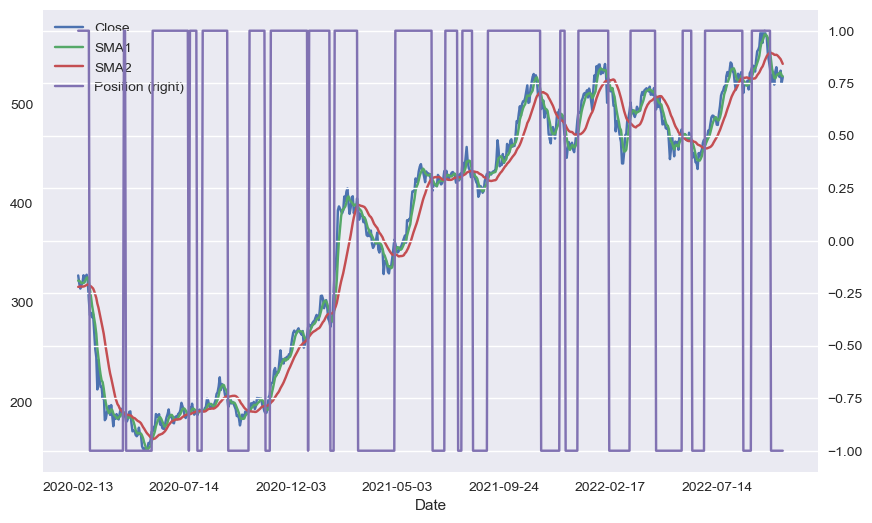

In [179]:
data.plot(figsize=(10, 6), secondary_y='Position');


In [180]:
sum(data['Position'].diff() != 0)

38

### backtesting

In [181]:
data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))

In [182]:
data.dropna(inplace = True)

In [183]:
data['Strategy'] = data['Position'].shift(1) * data['Returns']

In [184]:
data.dropna(inplace=True)

In [185]:
data[['Returns', 'Strategy']].sum()  # simple sum of log returns

Returns     0.501136
Strategy    0.600917
dtype: float64

In [186]:
np.exp(data[['Returns', 'Strategy']].sum())

Returns     1.650595
Strategy    1.823791
dtype: float64

In [187]:
np.exp(data[['Returns', 'Strategy']].sum()) - 1  # net performance of the stock & strategy

Returns     0.650595
Strategy    0.823791
dtype: float64

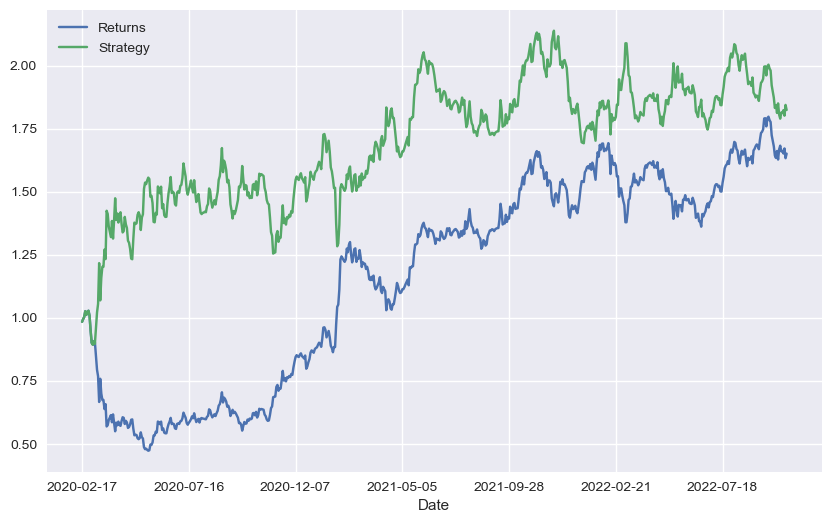

In [188]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

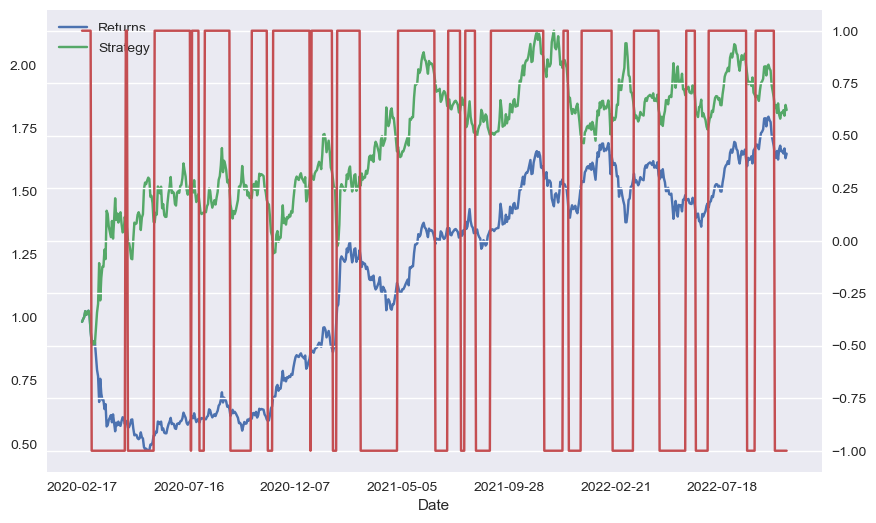

In [189]:
ax = data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))
data['Position'].plot(ax=ax, secondary_y='Position');